# PCA Anomalies

In [1]:
include("/Net/Groups/BGI/people/gkraemer/progs/data_cube/julia/notebooks/stuff.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6329810753526305699\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10738309099662066246\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/user/gkraemer//assetserver/549eec07f928a744cd5cefcd9652eb9af414188d-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-6329810753526305699\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Warning: RCall.jl: Loading required package: sp
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Checking rgeos availability: TRUE
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Loading required package: zoo
│ 
│ Attaching package: 'zoo'
│ 
│ The following objects are masked from 'package:base':
│ 
│     as.Date, as.Date.numeric
│ 
│ Loading required package: sandwich
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packag

PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 

In [2]:
cube_base = getCubeData(Cube(data_cube_dir), variable = vars, time = (Date("2001-01-01"), Date("2011-12-31")))
pca_no_msc_cube = loadCube(joinpath(cubes_base_dir, "pca_no_msc_cube"))
pca_msc_cube = loadCube(joinpath(cubes_base_dir, "pca_msc_cube"))
cube_time_space_mask = loadCube(joinpath(cubes_base_dir, "cube_time_space_mask"))
cube_msc_time_space_mask = loadCube(joinpath(cubes_base_dir, "cube_msc_time_space_mask"))
cube_pca_online = loadCube(joinpath(cubes_base_dir, "cube_pca_online"))

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
Total size: 29.32 GB


In [3]:
cube_z_trans = load(joinpath(cubes_base_dir, "z_trans_pca.jld2"), "z_trans")
cube_pca = load(joinpath(cubes_base_dir, "z_trans_pca.jld2"), "pca")

PCA(indim = 12, outdim = 12, principalratio = 1.0)

In [4]:
cube_extrema_msc = loadCube(joinpath(cubes_base_dir, "cube_extrema_msc"))
cube_extrema_no_msc = loadCube(joinpath(cubes_base_dir, "cube_extrema_no_msc"))
n_seasons = 4
comp = 1
doy_idxs = (length(getAxis(MSCAxis, pca_msc_cube)) ÷ n_seasons) .* (0:n_seasons - 1) .+ 1 |> collect
ex_msc = [
    cube_extrema_msc[:, i] |> 
    x -> abs.(x) |> 
    x -> max(x...) |> 
    x -> (-x, x) 
    for i in 1:size(cube_extrema_msc, 2)
]
ex_no_msc = [
    cube_extrema_no_msc[:, i] |> 
    x -> abs.(x) |>
    x -> max(x...) |> 
    x -> (-x, x) 
    for i in 1:size(cube_extrema_no_msc, 2)
]

12-element Array{Tuple{Float32,Float32},1}:
 (-5.2254515, 5.2254515)  
 (-4.324888, 4.324888)    
 (-5.6254683, 5.6254683)  
 (-2.8615625, 2.8615625)  
 (-5.3716016, 5.3716016)  
 (-3.310431, 3.310431)    
 (-3.1275787, 3.1275787)  
 (-1.5339583, 1.5339583)  
 (-4.438035, 4.438035)    
 (-1.7250496, 1.7250496)  
 (-1.4934131, 1.4934131)  
 (-0.89296293, 0.89296293)

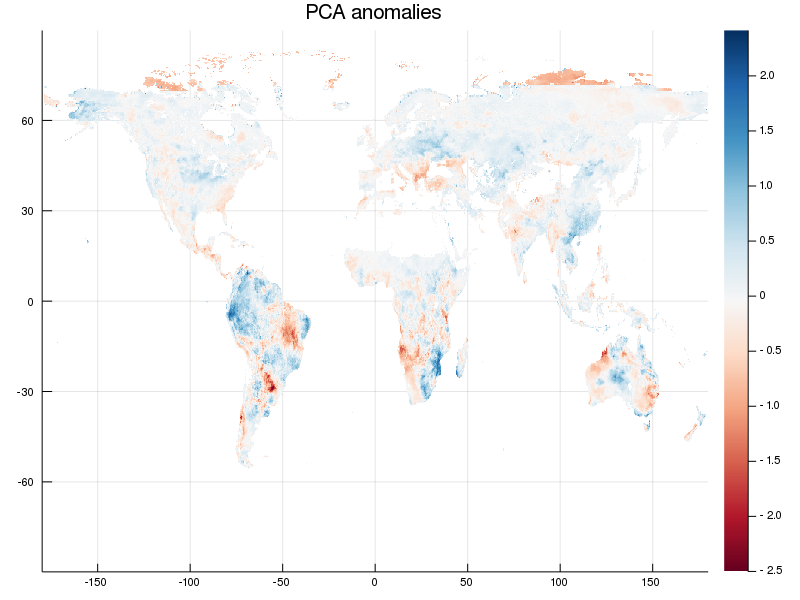

GKS: invalid bitmap size


In [5]:
time_idx = 47
pca_axis = 1

heatmap(
    getAxis(LonAxis, pca_no_msc_cube).values,
    getAxis(LatAxis, pca_no_msc_cube).values,
    pca_no_msc_cube[time_idx, pca_axis, :, :] |> 
        x -> convert(Array{Union{Float32, Missing}}, x) |> 
        missing_to_nan |> 
        drop_size_one_dims |> 
        rotl90,
    title = "PCA anomalies",
    color = :RdBu,
    fmt = :png, 
    size = (800, 600)
)

In [6]:
places

3-element Array{Array{T,1} where T,1}:
 [250, 750, 1200, 450, 1050, 900]                             
 [500, 570, 650, 350, 450, 570]                               
 ["Mexico", "Germany", "Siberia", "Amazon", "India", "Moscow"]

In [7]:
pc1_msc = Float64[]
pc2_msc = Float64[]
pc3_msc = Float64[]
l_msc = String[]

for i in 1:length(places[1])
    append!(pc1_msc, pca_msc_cube[:, 1, places[1][i], size(pca_msc_cube, 4) - places[2][i] + 1])
    append!(pc2_msc, pca_msc_cube[:, 2, places[1][i], size(pca_msc_cube, 4) - places[2][i] + 1])
    append!(pc3_msc, pca_msc_cube[:, 3, places[1][i], size(pca_msc_cube, 4) - places[2][i] + 1])
    append!(l_msc, repeat([ places[3][i] ], size(pca_msc_cube, 1)))
end

pc1 = Float64[]
pc2 = Float64[]
pc3 = Float64[]
l = String[]
for i in 1:length(places[1])
    append!(pc1, cube_pca_online[1, places[1][i], size(cube_pca_online, 3) - places[2][i] + 1, :] |> collect |> missing_to_nan)
    append!(pc2, cube_pca_online[2, places[1][i], size(cube_pca_online, 3) - places[2][i] + 1, :] |> collect |> missing_to_nan)
    append!(pc3, cube_pca_online[3, places[1][i], size(cube_pca_online, 3) - places[2][i] + 1, :] |> collect |> missing_to_nan)
    append!(l, repeat([ places[3][i] ], size(cube_pca_online, 4)))
end

In [8]:
using DelimitedFiles

In [9]:
writedlm(
    "location_table.csv", 
    [    
        ["time" "PC1" "PC2" "PC3" "Location"];
        repeat(getAxis("Time", cube_base).values, 6) [pc1    pc2   pc3   l]
    ]
    
)


In [10]:
function get_msc_hist(data, mask, d1, d2, places)
    valid_value_idx_msc = mask[:, :, :] .== 1

    x_all_msc = vec(data[:, d1, :, :])[vec(valid_value_idx_msc)] |> missing_to_nan
    y_all_msc = vec(data[:, d2, :, :])[vec(valid_value_idx_msc)] |> missing_to_nan
    w_all_msc = cosd.(repeat(
            collect(getAxis(LatAxis, data).values), 
            # lat comes last:
            inner = size(data, 1) * size(data, 3)
        )[vec(valid_value_idx_msc)]
    )

    fit(
        Histogram, 
        (x_all_msc, y_all_msc), 
        StatsBase.weights(w_all_msc), 
        #(-8.5f0:0.25f0:4.0f0, -5.0f0:0.25f0:7.5f0),
        #(-5.5f0:0.5f0:9.5f0, -8.0f0:0.5f0:7.0f0),
        closed = :right
    ) |> LinearAlgebra.normalize
end



function get_hist(data, mask, d1, d2, places)
    valid_value_idx = mask[:, :, :] .== 1

    x_all = vec(data[d1, :, :, :])[vec(valid_value_idx)] |> missing_to_nan
    y_all = vec(data[d2, :, :, :])[vec(valid_value_idx)] |> missing_to_nan

    w_all = cosd.(repeat(
            collect(getAxis(LatAxis, data).values), 
            inner = size(data, 2),
            outer = size(data, 4)
        )[vec(valid_value_idx)]
    )

    fit(
        Histogram,
        (x_all, y_all),
        StatsBase.weights(w_all), 
        #(-4.5f0:0.5f0:9.5f0, -8.0f0:0.5f0:7.0f0); 
        closed = :right
    ) |> LinearAlgebra.normalize
end    

get_hist (generic function with 1 method)

In [11]:
@time hist_msc_12 = get_msc_hist(pca_msc_cube, cube_msc_time_space_mask, 1, 2, places)
@time hist_msc_13 = get_msc_hist(pca_msc_cube, cube_msc_time_space_mask, 1, 3, places)
@time hist_msc_23 = get_msc_hist(pca_msc_cube, cube_msc_time_space_mask, 2, 3, places)

@time hist_12 = get_hist(cube_pca_online, cube_time_space_mask, 1, 2, places)
@time hist_13 = get_hist(cube_pca_online, cube_time_space_mask, 1, 3, places)
@time hist_23 = get_hist(cube_pca_online, cube_time_space_mask, 2, 3, places)

 15.818521 seconds (436.74 M allocations: 11.663 GiB, 21.14% gc time)
 12.643669 seconds (429.24 M allocations: 11.283 GiB, 22.92% gc time)
 12.435266 seconds (429.24 M allocations: 11.283 GiB, 23.53% gc time)
134.701076 seconds (4.72 G allocations: 128.024 GiB, 18.66% gc time)
130.846649 seconds (4.72 G allocations: 128.011 GiB, 18.91% gc time)
130.037016 seconds (4.72 G allocations: 128.011 GiB, 18.91% gc time)


Histogram{Float64,2,Tuple{StepRangeLen{Float32,Float64,Float64},StepRangeLen{Float32,Float64,Float64}}}
edges:
  -9.0f0:0.5f0:5.0f0
  -5.0f0:0.5f0:7.0f0
weights: [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
closed: right
isdensity: true

In [12]:
    # indexing in the cube starts in the NORTH WEST corner, see the direction of the axes for details!!!

pca_msc_cube_places = [pca_msc_cube[:, :, places[1][i], 720 - places[2][i]] for i in 1:length(places[1])]
pca_msc_cube_places = cat(pca_msc_cube_places..., dims = 3)
pca_msc_cube_places = convert(Array{Float64}, pca_msc_cube_places)

46×12×6 Array{Float64,3}:
[:, :, 1] =
 -1.91077  0.241071  -0.875289    0.335776   …  -0.0171449    0.00180584 
 -1.93853  0.138997  -0.685852    0.147989      -0.0166596   -0.00262136 
 -1.89248  0.176141  -0.643762    0.107943      -0.018322    -0.00528451 
 -1.83912  0.257666  -0.588541    0.0127838     -0.0197151   -0.00990456 
 -1.84603  0.454747  -0.526342   -0.078202      -0.021378    -0.0149242  
 -1.78328  0.472383  -0.515538   -0.108523   …  -0.0284287   -0.0178536  
 -1.65982  0.515629  -0.453817   -0.177992      -0.0334231   -0.0260166  
 -1.48034  0.585962  -0.396563   -0.382095      -0.0309008   -0.0324269  
 -1.45377  1.04965   -0.219357   -0.435446      -0.032302    -0.0454117  
 -1.62885  1.58417   -0.0701521  -0.330122      -0.0271012   -0.0357594  
 -1.63671  1.92798    0.0333873  -0.456531   …  -0.0209255   -0.0433079  
 -1.72335  2.24081    0.127357   -0.397001      -0.0172762   -0.0381529  
 -1.76776  2.4519     0.180322   -0.469008      -0.0112735   -0.0365716  


In [13]:
    # indexing in the cube starts in the NORTH WEST corner, see the direction of the axes for details!!!

cube_base_places = [cube_base[places[1][i], 720 - places[2][i], :, :] for i in 1:length(places[1])]
cube_base_places = cat(cube_base_places..., dims = 3)

506×12×6 Array{Union{Missing, Float32},3}:
[:, :, 1] =
 0.100299   -0.00349689  0.308764   0.0  …  0.0993816  0.333964  0.100629 
 0.0994322   0.213797    0.706366   0.0     0.250161   0.476465  0.0994165
 0.102297    0.297408    0.819239   0.0     0.302275   0.430049  0.102393 
 0.10307     0.406722    0.875917   0.0     0.323083   0.445421  0.10357  
 0.0994391   0.607025    0.791255   0.0     0.293815   0.37619   0.100512 
 0.0999108   0.446778    0.86858    0.0  …  0.339761   0.408895  0.102057 
 0.105177    0.614141    0.870206   0.0     0.308397   0.450944  0.108594 
 0.10843     0.784627    0.916344   0.0     0.355331   0.46641   0.112315 
 0.108682    1.29295     0.901178   0.0     0.329543   0.570161  0.112522 
 0.107381    1.48199     0.728257   0.0     0.235305   0.653287  0.11172  
 0.106465    0.969694    0.426246   0.0  …  0.16083    0.693269  0.111659 
 0.106058    0.541345    0.255021   0.0     0.121453   0.68096   0.111875 
 0.104248    0.519975    0.267784   0.0     0

In [14]:
R"""
pdf($(joinpath(fig_path, "distr_traj.pdf")), width = 8, height = 12)

# colors for the lines:
palette(brewer.pal(name = "Set1", n = 6))

# layout
wds <- c(0.15, 1, 1)
hgs <- rep(c(1, 0.1), 3)
line_gap <- 0.05
layout(matrix(c(4, 1, 2,
                0, 3, 3,
                8, 5, 6,
                0, 7, 7,
               12, 9, 10,
                0, 11, 11), 
              nrow = 6, ncol = 3, byrow = TRUE), 
       widths = wds, heights = hgs)

max_dens <- $(max(maximum(hist_12.weights), maximum(hist_msc_12.weights),
                  maximum(hist_13.weights), maximum(hist_msc_13.weights),
                  maximum(hist_23.weights), maximum(hist_msc_23.weights)))




# to show the actual extent of the distribution, 
# we remove the whites from the palette and set 
# only real zeros to white and small values to the 
# lightest grey value

pal <- brewer.pal(name = "Greys", n = 9)
# remove white from the palette
pal <- pal[-1]
# pal <- colorRampPalette(colors = pal)(100)

plot_dens <- function(d, x_ax, y_ax, color_pal = pal, yaxt = "s") {
    d[d == 0] <- NA
    image(x = x_ax, y = y_ax, d, col = color_pal, bty = "n", yaxt = yaxt, xlab = NA, ylab = NA)
}

plot_traj <- function(df, is_msc = FALSE) {
    for (l in 1:nlevels(df$l)) {
        lines(df[as.numeric(df$l) == l,], col = l, lwd = if(is_msc) 4 else 0.1)
    }    
}

draw_arrow <- function(df, country, center = floor(46 / 4)) {
    c_level <- which(levels(df$l) == country)
    df[as.numeric(df$l) == c_level,] %>%
        {.[c(center, center + 1), ]} %>%
        {
            arrows(
                .$x[1], .$y[1], .$x[2], .$y[2], 
                lwd = 4, length = 0.15,
                col = c_level
            )
        }
}


center_line <- function(h = 1) {
    grid.lines(
        x = (wds[1] + wds[2]) / sum(wds),
        y = c(sum(hgs[(2 * h    ):6]) / sum(hgs) + line_gap, 
              sum(hgs[(2 * h - 1):6]) / sum(hgs) - line_gap)
    )    
}

plot_map <- function(fig) {
    par(new = TRUE, fig = fig, mar = c(0, 0, 0, 0))
    plot(1:10, type = "n", xlim = c(-180, 180), ylim = c(-60, 90), axes = F)
    maps::map("world", col = "black", ylim=c(-60, 90), add = TRUE)

    order_idx <- order($(places[3]))

    points(
        $(cube_base.lonAxis.values[places[1]])[order_idx],
        $(-cube_base.latAxis.values[places[2]])[order_idx], 
        col = seq_along(order_idx),
        pch = 16, cex = 3
    )
}

get_mod_46_plus_t <- function(t, lim) {
    seq(from = t, to = lim, by = 46)
}

plot_example_values <- function(x, y, t, comp1, comp2, place, adj = c(0, 0)) {
    vars <- c("gross_primary_productivity", "terrestrial_ecosystem_respiration", 
              "sensible_heat", "latent_energy", "root_moisture", 
              "black_sky_albedo")
    var_labels <- c("GPP", "Ecosystem Respiration",
                    "Sensible Heat", "Latent Heat", "Root Moisture",
                    "Black Sky Albedo")
    cube_var_idx <- sapply(vars, function(v) which($(getAxis(VariableAxis, cube_base).values) %in% v))

    var_vals <- $(cube_base_places)[get_mod_46_plus_t(t, 506), cube_var_idx, place]
    var_vals <- colMeans(var_vals, na.rm = TRUE)
    comp1_val <- $(pca_msc_cube_places)[t, comp1, place]
    comp2_val <- $(pca_msc_cube_places)[t, comp2, place]

    lab <- mapply(
        function(l, v) paste0(l, ": ", sprintf("%0.2f", v)), 
        l = var_labels, v = var_vals
    )

    segments(comp1_val, comp2_val, x, y)

    text(x = x, y = y, labels = paste(lab, collapse = "\n"), adj = adj) 
}


## 1-2 #########################################################################
par(mar = c(2.1, 0, 0, 0.4))
par(las = 1)


plot_dens(
    $(hist_12.weights), 
    $(collect(hist_12.edges[1])),
    $(collect(hist_12.edges[2]))
)


plot_traj(data.frame(x = $pc1, y = $pc2, l = factor($l)))


plot_dens(
    $(hist_msc_12.weights),
    $(collect(hist_msc_12.edges[1])),
    $(collect(hist_msc_12.edges[2])),
    yaxt = "n"
)

df <- data.frame(x = $pc1_msc, y = $pc2_msc, l = factor($l_msc))
plot_traj(df, is_msc = TRUE)
draw_arrow(df, "Mexico")
draw_arrow(df, "Moscow")
draw_arrow(df, "India", center = 46 / 2)
draw_arrow(df, "Siberia", center = 19)

par(xpd = NA)
plot_example_values(x = -4, y =  1, t = 22, comp1 = 1, comp2 = 2, place = 1, adj = c(1, 0.5))
plot_example_values(x = -2, y = -5, t =  5, comp1 = 1, comp2 = 2, place = 3, adj = c(1, 1))
plot_example_values(x =  4, y = -4, t = 40, comp1 = 1, comp2 = 2, place = 4, adj = c(1, 1))
par(xpd = FALSE)

legend(
    "topright",
    legend = levels(df$l),
    col = seq_along(levels(df$l)),
    lty = 1,
    lwd = 7,
    pch = 1,
    pt.cex = 2,
    cex = 1.2,
    bty = 'n'
)

plot.new()
mtext(expression(low~productivity%<-%PC[1]%->%high~productivity), 1)

par(mar = c(0, 2, 0, 0))
plot.new()
mtext(expression(wet%<-%PC[2]%->%dry), 2, las = 0)


## 1-3 #########################################################################
par(mar = c(2.1, 0, 0, 0.4))
par(las = 1)

plot_dens(
    $(hist_13.weights), 
    $(collect(hist_13.edges[1])),
    $(collect(hist_13.edges[2]))
)

plot_traj(data.frame(x = $pc1, y = $pc3, l = factor($l)))

plot_dens(
    $(hist_msc_13.weights),
    $(collect(hist_msc_13.edges[1])),
    $(collect(hist_msc_13.edges[2])),
    yaxt = "n"
)

df <- data.frame(x = $pc1_msc, y = $pc3_msc, l = factor($l_msc))

plot_traj(df, is_msc = TRUE)
draw_arrow(df, "Mexico")
draw_arrow(df, "Moscow")
draw_arrow(df, "India", center = 46 / 2)
draw_arrow(df, "Siberia", center = 19)

par(xpd = NA)
plot_example_values(x = -2, y = -3, t =  5, comp1 = 1, comp2 = 3, place = 2, adj = c(1, 0.5))
plot_example_values(x = -6, y =  4, t =  6, comp1 = 1, comp2 = 3, place = 3, adj = c(1, 0.5))
plot_example_values(x =  6, y = -1, t = 40, comp1 = 1, comp2 = 3, place = 4, adj = c(1, 1))
par(xpd = FALSE)

plot.new()
mtext(expression(low~productivity%<-%PC[1]%->%high~productivity), 1)

par(mar = c(0, 2, 0, 0))
plot.new()
mtext(expression(low~albedo%<-%PC[3]%->%high~albedo), 2, las = 0)

## 2-3 #########################################################################
par(mar = c(2.1, 0, 0, 0.4))
par(las = 1)

plot_dens(
    $(hist_23.weights), 
    $(collect(hist_23.edges[1])),
    $(collect(hist_23.edges[2]))
)

plot_traj(data.frame(x = $pc2, y = $pc3, l = factor($l)))

plot_dens(
    $(hist_msc_23.weights),
    $(collect(hist_msc_23.edges[1])),
    $(collect(hist_msc_23.edges[2])),
    yaxt = "n"
)

df <- data.frame(x = $pc2_msc, y = $pc3_msc, l = factor($l_msc))

plot_traj(df, is_msc = TRUE)
draw_arrow(df,"Mexico")
draw_arrow(df,"Moscow", center = 20)
draw_arrow(df,"India", center = 46 / 2)
draw_arrow(df,"Siberia", center = 19)

par(xpd = NA)
plot_example_values(x = 3, y =  4, t = 22, comp1 = 2, comp2 = 3, place = 1, adj = c(1, 0.5))
plot_example_values(x = -5, y = 4, t =  5, comp1 = 2, comp2 = 3, place = 3, adj = c(1, 1))
plot_example_values(x = -4, y = -3, t =  5, comp1 = 2, comp2 = 3, place = 2, adj = c(1, 0.5))
par(xpd = FALSE)

plot.new()
mtext(expression(wet%<-%PC[2]%->%dry), 1, las = 0)

par(mar = c(0, 2, 0, 0))
plot.new()
mtext(expression(low~albedo%<-%PC[3]%->%high~albedo), 2, las = 0)


############################### decorations ##################


center_line(1)
center_line(2)
center_line(3)

label_grid <- function(l, x, y) {
    grid.text(
        l, 
        (sum(wds[1:x]) + line_gap / 2) / sum(wds),
        (1 - (y - 1) / 3) - line_gap * hgs[1] / sum(hgs),
        just = c(0, 1)
    )
}

label_grid("(a)", 1, 1)
label_grid("(b)", 2, 1)
label_grid("(c)", 1, 2)
label_grid("(d)", 2, 2)
label_grid("(e)", 1, 3)
label_grid("(f)", 2, 3)

plot_map(fig = c(0.18, 0.5, 0.72, 0.85))

dev.off()

"""

RObject{IntSxp}
null device 
          1 


In [16]:
show_pdf(
    "https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/distr_traj.pdf",
    width = 700,
    height = 1100
)

(object { attributes=Dict(:type=>"application/pdf",:height=>"1100",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/distr_traj.pdf",:width=>"700") }
  "pdf not found")

In [17]:
cube_base

rmprocs(workers())
addprocs(40)
cube_mask = mapCube(
    cube_base,
    indims = InDims(VariableAxis),
    outdims = OutDims()
) do xout, xin
    xout[1] = !any(ismissing, xin)
end
rmprocs(workers())

n = cube_mask[:, :, :] |> skipmissing |> x -> Int64.(x) |> sum

720 * 1440 * 506

n / (720 * 1440 * 506)

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:09:09m09


0.20273720752208071

In [18]:
# California

pc1, t_idx = pca_msc_cube[:,     1, places[1][1], 720 - places[2][1]] |> findmin
pc2        = pca_msc_cube[t_idx, 2, places[1][1], 720 - places[2][1]] 
cal_xy = [pc1, pc2]
cal_var = [ 
    cube_base[places[1][1], 720 - places[2][1], t_idx,  5],
    cube_base[places[1][1], 720 - places[2][1], t_idx, 11],
    cube_base[places[1][1], 720 - places[2][1], t_idx,  6],
    cube_base[places[1][1], 720 - places[2][1], t_idx,  9],
    cube_base[places[1][1], 720 - places[2][1], t_idx,  8] 
]

# Siberia
pc2, t_idx = pca_msc_cube[:,     2, places[1][3], 720 - places[2][3]] |> findmin
pc1        = pca_msc_cube[t_idx, 1, places[1][3], 720 - places[2][3]] 
sib_xy = [pc1, pc2]
sib_var = [ 
    cube_base[places[1][3], 720 - places[2][3], t_idx,  5],
    cube_base[places[1][3], 720 - places[2][3], t_idx, 11],
    cube_base[places[1][3], 720 - places[2][3], t_idx,  9],
    cube_base[places[1][3], 720 - places[2][3], t_idx,  6],
    cube_base[places[1][3], 720 - places[2][3], t_idx,  8] 
]


# Amazon
pc1, t_idx = pca_msc_cube[:,     1, places[1][4], 720 - places[2][4]] |> findmax
pc2        = pca_msc_cube[t_idx, 2, places[1][4], 720 - places[2][4]] 
ama_xy = [pc1, pc2]
ama_var = [ 
    cube_base[places[1][4], 720 - places[2][4], t_idx,  5],
    cube_base[places[1][4], 720 - places[2][4], t_idx, 11],
    cube_base[places[1][4], 720 - places[2][4], t_idx,  9],
    cube_base[places[1][4], 720 - places[2][4], t_idx,  6],
    cube_base[places[1][4], 720 - places[2][4], t_idx,  8] 
]


5-element Array{Float32,1}:
  7.3103676 
  5.477484  
  3.0530553 
 10.495972  
  0.38748237

In [19]:
rmprocs(procs())
addprocs(40)
cube_max = mapCube(
    cube_base,
    indims = InDims("Time"),
    outdims = OutDims()
) do xout, xin
    xout[1] = findmax(collect(skipmissing(xin)))[1]
end
rmprocs(procs())

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:03:26m
┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928


Task (done) @0x00007ff9bacbc280

In [20]:
rmprocs(procs())
addprocs(40)
cube_min = mapCube(
    cube_base,
    indims = InDims("Time"),
    outdims = OutDims()
) do xout, xin
    xout[1] = findmin(collect(skipmissing(xin)))[1]
end
rmprocs(procs())

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:05:05m
┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928


Task (done) @0x00007ff9befbc760

In [21]:
rmprocs(procs())
addprocs(40)
msc_cube = getMSC(cube_base)
rmprocs(procs())

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:06:32m
┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928


Task (done) @0x00007ff9befb4760

In [22]:
msc_cube

Memory mapped cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01 to 1900-12-27
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Variable            Axis with 12 elements: black_sky_albedo evaporation .. terrestrial_ecosystem_respiration white_sky_albedo 
Total size: 2.67 GB


In [23]:
rmprocs(procs())
addprocs(40)
cube_max_msc = mapCube(
    msc_cube,
    indims = InDims("MSC"),
    outdims = OutDims()
) do xout, xin
    xout[1] = findmax(collect(skipmissing(xin)))[1]
end
rmprocs(procs())

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:27:01m43
┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928


Task (done) @0x00007ff8e60c1390

In [24]:
rmprocs(procs())
addprocs(40)
cube_min_msc = mapCube(
    msc_cube,
    indims = InDims("MSC"),
    outdims = OutDims()
) do xout, xin
    xout[1] = findmin(collect(skipmissing(xin)))[1]
end
rmprocs(procs())

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Progress: 100%|█████████████████████████████████████████| Time: 0:26:52m:24
┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928


Task (done) @0x00007ff94b968760

In [26]:
#plotMAP(cube_max)

In [27]:
#plotMAP(cube_min)

In [28]:
#plotMAP(cube_max_msc)

In [29]:
#plotMAP(cube_min_msc)

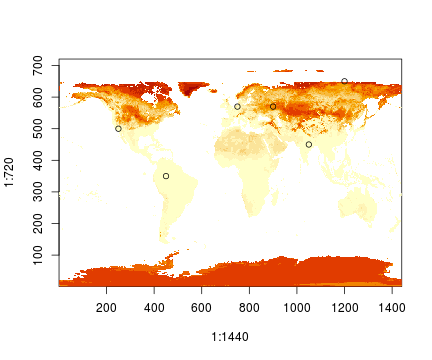

RObject{NilSxp}
NULL


In [30]:
R"""

image(x = 1:1440, y =  1:720, 
      z = $(cube_base[:, :, 1, 1] |> collect |> missing_to_nan |> x -> x[:, end:-1:1] .|> Float64))
points($(places[1]), $(places[2]))

"""

In [31]:
cube_base = getCubeData(Cube(data_cube_dir), variable = vars, time = (Date("2001-01-01"), Date("2011-12-31")))

Data Cube view with the following dimensions
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
Variable            Axis with 12 elements: black_sky_albedo evaporation .. terrestrial_ecosystem_respiration white_sky_albedo 
Total size: 29.32 GB


In [32]:
function recon_pc12(pc1, pc2, idx)
    [pc1, pc2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] |>
        x -> reconstruct(cube_pca, x)                            |>
        x -> (x .* cube_z_trans.scale) .+ cube_z_trans.mean      |>
        x -> x[idx]
end

recon_pc12 (generic function with 1 method)

In [33]:
recon_le = recon_pc12.(collect(-4:0.25:5), permutedims(collect(-5:0.25:4)), 6)
recon_h = recon_pc12.(collect(-4:0.25:5), permutedims(collect(-5:0.25:4)), 9)
recon_bowen = recon_h ./ recon_le

37×37 Array{Float64,2}:
   0.881474    0.796893   0.706483  …  29.8726    23.2231    19.2451  
   1.02446     0.930614   0.829114     11.9367    10.9308    10.1375  
   1.22567     1.12137    1.00666       7.46869    7.15622    6.88853 
   1.52976     1.41555    1.28666       5.43989    5.32413    5.22093 
   2.04273     1.92854    1.79373       4.28116    4.24193    4.20612 
   3.09235     3.04902    2.99253   …   3.53163    3.52743    3.52354 
   6.44454     7.42248    9.33536       3.00706    3.02044    3.03299 
 -66.1259    -16.3197    -8.08194       2.61939    2.64203    2.66343 
  -5.33224    -3.84482   -2.78949       2.32122    2.34879    2.37501 
  -2.76154    -2.16554   -1.67435       2.08476    2.11487    2.14365 
  -1.85564    -1.50059   -1.19032   …   1.89265    1.92392    1.95394 
  -1.3929     -1.14413   -0.919804      1.73348    1.7651     1.79557 
  -1.11205    -0.921895  -0.747055      1.59944    1.63093    1.66135 
   ⋮                                ⋱              ⋮ 

In [34]:
R"""max(1:3)"""

RObject{IntSxp}
[1] 3


In [87]:
R"""
pdf($(joinpath(fig_path, "bowen.pdf")), width = 9, height = 3.3)

layout(t(1:3))
par(mar = c(4, 4, 0, 0) + 0.1)

pal <- brewer.pal(name = "Greys", n = 9)
x_coord <- seq(-4, 5, by = 0.25)
y_coord <- seq(-5, 4, by = 0.25)
w_msc <- $(hist_msc_12.weights)
max_dens <- max(w_msc)
image(
    x = $(collect(hist_msc_12.edges[1])),
    y = $(collect(hist_msc_12.edges[2])),
    w_msc, 
    #useRaster = TRUE, 
    col = pal,
    bty = "n",
    #yaxt = "n",
    xlim = range(x_coord),
    ylim = range(y_coord),
    zlim = c(0, max_dens),
    xlab = expression(PC[1]), ylab = expression(PC[2]),
    asp = 1
)
contour(x_coord, y_coord, $recon_le, add = TRUE)
image(
    x = $(collect(hist_msc_12.edges[1])),
    y = $(collect(hist_msc_12.edges[2])),
    w_msc, 
    #useRaster = TRUE, 
    col = pal,
    bty = "n",
    yaxt = "n",
    xlim = range(x_coord),
    ylim = range(y_coord),
    zlim = c(0, max_dens),
    xlab = expression(PC[1]), ylab = NA,
    asp = 1
)
contour(x_coord, y_coord, $recon_h, add = TRUE)
image(
    x = $(collect(hist_msc_12.edges[1])),
    y = $(collect(hist_msc_12.edges[2])),
    w_msc, 
    #useRaster = TRUE, 
    col = pal,
    bty = "n",
    yaxt = "n",    
    xlim = range(x_coord),
    ylim = range(y_coord),
    zlim = c(0, max_dens),
    xlab = expression(PC[1]), ylab = NA,
    asp = 1
)
contour(
    x_coord, y_coord, log($recon_bowen), 
    zlim = c(-2, 2), 
    add = TRUE
)

angle <- 60
text(0.8, 4, "H > LE", adj = c(1, 0.5), srt = angle)
text(1.2, 3, "LE > H", adj = c(0, 0.5), srt = angle)


grid.text("(a)",    0, 1, hjust = 0, vjust = 1)
grid.text("(b)", 0.33, 1, hjust = 0, vjust = 1)
grid.text("(c)", 0.66, 1, hjust = 0, vjust = 1)

dev.off()
"""
show_pdf(
    "https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/bowen.pdf",
    width = 900,
    height = 500
)

┌ Warning: RCall.jl: Warning in log(`#JL`$recon_bowen) : NaNs produced
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113


(object { attributes=Dict(:type=>"application/pdf",:height=>"500",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/bowen.pdf",:width=>"900") }
  "pdf not found")

In [77]:
cube_z_trans
cube_pca
vars
tan(60)

0.320040389379563

In [74]:
v1LE = cube_pca.proj[1, 6]
v2LE = cube_pca.proj[2, 6]
σLE = cube_z_trans.scale[6]
v1H = cube_pca.proj[1, 9]
v2H = cube_pca.proj[2, 9]
σH = cube_z_trans.scale[9]
atand(((v1H/σH + v1LE/σLE)/(v2H/σH + v2LE/σLE)))

-7.743868296631921

In [51]:
R"library(viridis)"

┌ Warning: RCall.jl: Loading required package: viridisLite
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113


RObject{StrSxp}
 [1] "viridis"      "viridisLite"  "forcats"      "stringr"      "dplyr"       
 [6] "purrr"        "readr"        "tidyr"        "tibble"       "tidyverse"   
[11] "ncdf4"        "energy"       "strucchange"  "sandwich"     "zoo"         
[16] "maps"         "maptools"     "RColorBrewer" "gridExtra"    "animation"   
[21] "raster"       "sp"           "ggthemes"     "ggplot2"      "grid"        
[26] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[31] "methods"      "base"        


In [52]:
R"""
pdf($(joinpath(fig_path, "min_max_maps.pdf")), width = 9, height = 7)

layout(
    matrix(
        c(1, 2,
          3, 4,
          5, 6),
        ncol = 2,
        byrow = TRUE
    )
)

pal <- c(rev(viridis(100)))
asp <- 720 / 1440

par(mar = c(0, 0, 0, 0) , bty = "n")

plot(raster($(cube_min_msc[:, 1:600, 5] |> collect |> missing_to_nan |> permutedims |> x -> Float64.(x))),
     axes = FALSE, col = pal, asp = asp)
plot(raster($(cube_max_msc[:, 1:600, 5] |> collect |> missing_to_nan |> permutedims |> x -> Float64.(x))),
     axes = FALSE, col = pal, asp = asp)

plot(raster($(cube_min_msc[:, 1:600, 6] |> collect |> missing_to_nan |> permutedims |> x -> Float64.(x))),
     axes = FALSE, col = pal, asp = asp)
plot(raster($(cube_max_msc[:, 1:600, 6] |> collect |> missing_to_nan |> permutedims |> x -> Float64.(x))),
     axes = FALSE, col = pal, asp = asp)

plot(raster($(cube_min_msc[:, 1:600, 9] |> collect |> missing_to_nan |> permutedims |> x -> Float64.(x))),
     axes = FALSE, col = pal, asp = asp)
plot(raster($(cube_max_msc[:, 1:600, 9] |> collect |> missing_to_nan |> permutedims |> x -> Float64.(x))),
     axes = FALSE, col = pal, asp = asp)

grid.text("(a)",   0,    1, hjust = 0, vjust = 1)
grid.text("(b)", 0.5,    1, hjust = 0, vjust = 1)
grid.text("(c)",   0, 0.66, hjust = 0, vjust = 1)
grid.text("(d)", 0.5, 0.66, hjust = 0, vjust = 1)
grid.text("(e)",   0, 0.33, hjust = 0, vjust = 1)
grid.text("(f)", 0.5, 0.33, hjust = 0, vjust = 1)

grid.text("MSC min", 1/4, 1, vjust = 1.2)
grid.text("MSC max", 3/4, 1, vjust = 1.2)
grid.text(expression("GPP "           * group("[", gC * m^-2 * day^-1, "]")), 0, 5/6, vjust = 1.2, rot = 90)
grid.text(expression("Latent energy " * group("[", W * m^-2,           "]")), 0, 3/6, vjust = 1.2, rot = 90)
grid.text(expression("Sensible heat " * group("[", W * m^-2,           "]")), 0, 1/6, vjust = 1.2, rot = 90)

dev.off()
"""
show_pdf(
    "https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/min_max_maps.pdf",
    width = 700,
    height = 900
)

(object { attributes=Dict(:type=>"application/pdf",:height=>"900",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/min_max_maps.pdf",:width=>"700") }
  "pdf not found")

In [204]:
lon_ax = getAxis("Lon", pca_no_msc_cube)
lat_ax = getAxis("Lat", pca_no_msc_cube)
t_ax = getAxis("Time", pca_no_msc_cube)
#cutpoint = 900

cutlat1 = 44.875
pc1 = 1
cutpoint1 = axVal2Index(lon_ax, cutlat1)

cutlat2 = -62.625
pc2 = 2
cutpoint2 = axVal2Index(lon_ax, cutlat2)

cutlat3 = 98.5
pc3 = 3
cutpoint3 = axVal2Index(lon_ax, cutlat3)




R"""
pdf($(joinpath(fig_path, "msc_anom.pdf")), width = 14, height = 9)
data(coastsCoarse, package = "rworldmap")

ex_scale_factor <- 0.8
color_bar_rel_height <- 0.28
rel_map_width <- 1
below_plot_spacing <- 0.258
bottom_space <- color_bar_rel_height + below_plot_spacing

elem_col <- "black" #"grey50"

pal1 <- c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
              "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
              "#35978F", "#01665E", "#003C30")
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
          "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
          "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
          "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
          "#8073ac","#542788","#2d004b")
pal3 <- colorRampPalette(colors = pal3)(100)

r2a <- function(x) {
    x <- as.array(x)
    x <- (x)[, dim(x)[2]:1]
}

label_cex <- 1.3
scale_cex <- 1.1
image_x_min_col <- 200

t_ax   <- $(getAxis("Time", pca_no_msc_cube).values |> collect)
lon_ax <- $(getAxis("Lon",  pca_no_msc_cube).values |> collect .|> Float64)
lat_ax <- $(getAxis("Lat",  pca_no_msc_cube).values |> collect .|> Float64)

asp_man <- 720 / 1440

map1 <- $(pca_no_msc_cube[1, pc1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
map2 <- $(pca_no_msc_cube[1, pc2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
map3 <- $(pca_no_msc_cube[1, pc3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)

time_cutout1_pc1 <- $(pca_no_msc_cube[:, pc1, cutpoint1, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout1_pc2 <- $(pca_no_msc_cube[:, pc2, cutpoint1, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout1_pc3 <- $(pca_no_msc_cube[:, pc3, cutpoint1, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)

time_cutout2_pc1 <- $(pca_no_msc_cube[:, pc1, cutpoint2, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout2_pc2 <- $(pca_no_msc_cube[:, pc2, cutpoint2, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout2_pc3 <- $(pca_no_msc_cube[:, pc3, cutpoint2, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)

time_cutout3_pc1 <- $(pca_no_msc_cube[:, pc1, cutpoint3, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout3_pc2 <- $(pca_no_msc_cube[:, pc2, cutpoint3, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout3_pc3 <- $(pca_no_msc_cube[:, pc3, cutpoint3, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)


ex1 <- max(abs(range(c(map1, time_cutout1_pc1, time_cutout2_pc1, time_cutout3_pc1), na.rm = TRUE)))
ex1 <- c(-ex1, ex1) * ex_scale_factor

ex2 <- max(abs(range(c(map2, time_cutout2_pc1, time_cutout2_pc2, time_cutout3_pc2), na.rm = TRUE)))
ex2 <- c(-ex2, ex2) * ex_scale_factor
 
ex3 <- max(abs(range(c(map3, time_cutout3_pc1, time_cutout3_pc2, time_cutout3_pc3), na.rm = TRUE)))
ex3 <- c(-ex3, ex3) * ex_scale_factor


n_lines_below_second_row <- 5

# layout:
#
#   map_pc1, cutouts: pc1,pc2,pc3,
#   map_pc2, cutouts: pc1,pc2,pc3,
#   map_pc3, cutouts: pc1,pc2,pc3,
#   spacer
#   colourbars: pc1, pc2, pc3

layout(matrix(c(1,1,1,    2,2,2,    3,3,3,    4,4,4, 
                5,5,5,    6,6,6,    7,7,7,    8,8,8,
                9,9,9, 10,10,10, 11,11,11, 12,12,12,
                 0,0,0,0,0,0,0,0,0,0,0,0,
                13,13,13,13, 14,14,14,14, 15,15,15,15), 
              nrow = 5, 
              ncol = 12,
              byrow = TRUE),
       heights = c(1, 1, 1, below_plot_spacing, color_bar_rel_height), 
       widths = c(rep(rel_map_width, 4), 1,1,1,1, 1,1,1,1, 1,1,1,1))

# Plot the first row

upper_mar <- 0.5
left_mar <- 4.5

plot_map <- function(map, cutlat, ex, pal, xax = FALSE, 
                     scalecex = scale_cex, elemcol = elem_col, labelcex = label_cex, 
                     upper_mar = 0.5, left_mar = 4.5, lon_axis = lon_ax, lat_axis = lat_ax) {
    par(mar = c(0, left_mar, upper_mar, 0.1))
    image(
        lon_axis, rev(lat_axis), r2a(map), 
        zlim = ex,
        bty = "n", 
        xaxt = "n", 
        xlab = if (xax) expression(paste("Lon [", degree, "]")) else NA,
        ylab = expression(paste("Lat [", degree, "]")),
        ylim = c(-70, 80),
        las = 1,
        col = pal,
        col.lab = elemcol,
        cex.axis = scalecex,
        cex.lab = labelcex,
        axes = FALSE,
        useRaster = TRUE
    )
    plot(coastsCoarse, add = TRUE, col = "black")
    abline(v = cutlat, col = "red")
    axis(2, col = elemcol, col.axis = elemcol, las = 1, cex.axis = scalecex)
    if(xax)
        axis(1, col = elem_col, col.axis = elem_col, las = 1, cex.axis = scale_cex)
}

plot_cutout <- function(time_cutout, ex, pal, xax = FALSE,
                        time_axis = t_ax, lat_axis = lat_ax, 
                        scalecex = scale_cex, elemcol = elem_col, 
                        labelcex = label_cex) {
    par(mar = c(0, 0, upper_mar, 0.1))
    image(
        seq_along(time_axis), 
        rev(lat_axis), 
        r2a(time_cutout), 
        ylim = c(-70, 80),
        cex.axis = scalecex,
        cex.lab = labelcex,
        xlab = if(xax) "Time [Year]" else NA, 
        xaxt = "n",
        ylab = NA,
        yaxt = "n", col = pal, bty = "n", zlim = ex,
        useRaster = TRUE
    )
    if(xax) {
        par(new = TRUE)
        plot(t_ax, seq_along(t_ax), type = "n", bty = "n", axes = FALSE, xlab = NA, ylab = NA, xaxs = "i")
        axis.Date(1, t_ax,col = elem_col, col.axis = elem_col, las = 1, cex.axis = scale_cex)
    }
}

plot_colorbar <- function(pal, ex, lab, scalecex = scale_cex, labelcex = label_cex, elemcol = elem_col) {
        par(mar = c(4, 5, 0, 5))

        image(matrix(1:100), col = pal,
              axes = FALSE, bty = "n", 
              xlab = lab,
              cex.axis = scalecex,
              cex.lab = labelcex,
                col.lab = elemcol,
              useRaster = TRUE)
        axis(1, 
             at = seq(from =    (ceiling(ex[1]) - ex[1]) / (ex[2] - ex[1]), 
                      to =  1 - (ex[2] - floor(ex[2]))   / (ex[2] - ex[1]), 
                      length.out = 5),
             labels = seq(ceiling(ex[1]), floor(ex[2]), length.out = 5),
             col = elemcol, col.axis = elemcol,
             cex.axis = scalecex)
}

# Plot the first row

plot_map(map1, $cutlat1, ex = ex1, pal = pal1)
plot_cutout(time_cutout1_pc1, ex1, pal1)
plot_cutout(time_cutout1_pc2, ex2, pal2)
plot_cutout(time_cutout1_pc3, ex3, pal3)

# Plot the second row

plot_map(map2, $cutlat2, ex = ex2, pal = pal2)
plot_cutout(time_cutout2_pc1, ex1, pal1)
plot_cutout(time_cutout2_pc2, ex2, pal2)
plot_cutout(time_cutout2_pc3, ex3, pal3)

# Plot the third row

plot_map(map3, $cutlat3, ex = ex3, pal = pal3, xax = TRUE)
plot_cutout(time_cutout3_pc1, ex1, pal1, xax = TRUE)
plot_cutout(time_cutout3_pc2, ex2, pal2, xax = TRUE)
plot_cutout(time_cutout3_pc3, ex3, pal3, xax = TRUE)

# Plot color bars

plot_colorbar(pal1, ex1, expression(lower~productivity %<-% PC[1]~anomaly %->% higher~productivity))
plot_colorbar(pal2, ex2, expression(wetter %<-% PC[2]~anomaly %->% dryer)                          )
plot_colorbar(pal3, ex3, expression(darker %<-% PC[3]~anomaly %->% lighter)                        )

# decorations

grid.text("(a)", 0.04, 1,                                       just = c(-0.3, 1.3))
grid.text("(b)",  1/4, 1,                                       just = c(-0.3, 1.3))
grid.text("(c)",  2/4, 1,                                       just = c(-0.3, 1.3))
grid.text("(d)",  3/4, 1,                                       just = c(-0.3, 1.3))
grid.text("(e)", 0.04, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(f)",  1/4, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(g)",  2/4, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(h)",  3/4, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(i)", 0.04, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(j)",  1/4, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(k)",  2/4, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(l)",  3/4, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))

grid.lines(1/4,           c(0.2, 0.96),                            gp = gpar(col = elem_col))
grid.lines(2/4,           c(0.2, 0.96),                            gp = gpar(col = elem_col))
grid.lines(3/4,           c(0.2, 0.96),                            gp = gpar(col = elem_col))
grid.lines(c(0.07, 0.97), (bottom_space + 2) / (bottom_space + 3), gp = gpar(col = elem_col))
grid.lines(c(0.07, 0.97), (bottom_space + 1) / (bottom_space + 3), gp = gpar(col = elem_col))

# events

# russian heatwave
xx <- 0.85; yy <- (bottom_space + 2 + 0.86) / (bottom_space + 3)
grid.circle(x = (1:3)/4 + xx/4, y = yy, r = 0.03)
grid.text(label = "Russian Heatwave", x = 1/4 + 0.1, y = yy)

# horn of africa flood
xx <- 0.53; yy <- (bottom_space + 2 + 0.5) / (bottom_space + 3)
grid.circle(x = (1:3)/4 + xx/4, y = yy, r = 0.03)
grid.text(label = "Floods Horn of Africa", x = 1/4 + 0.05, y = yy)

# amazon droughts
xx <- 0.8; yy <- (bottom_space + 1 + 0.45) / (bottom_space + 3)
grid.circle(x = (1:3)/4 + xx/4, y = yy, r = 0.03)
xx <- 0.4
grid.circle(x = (1:3)/4 + xx/4, y = yy, r = 0.03)
grid.text(label = "Droughts Amazon", x = 2/4 + 0.45/4, y = yy + 0.06)

# extreme snow sichuan
xx <- 0.63; yy <- (bottom_space + 0.69) / (bottom_space + 3)
grid.circle(x = (1:3)/4 + xx/4, y = yy, r = 0.03)
grid.text(label = "Extreme Snow China", x = 3/4 + 0.01, y = yy)

dev.off()
"""

show_pdf("https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/msc_anom.pdf", width = 900, height = 700)

(object { attributes=Dict(:type=>"application/pdf",:height=>"700",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/msc_anom.pdf",:width=>"900") }
  "pdf not found")

In [135]:
cube_pca_online

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
Total size: 29.32 GB


In [136]:
pca_no_msc_cube

Memory mapped cube with the following dimensions
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 29.32 GB


In [208]:
##### This is the same as the above figure, but no anomalies, in response to comment referee 2

lon_ax = getAxis("Lon", pca_no_msc_cube)
lat_ax = getAxis("Lat", pca_no_msc_cube)
t_ax = getAxis("Time", pca_no_msc_cube)
#cutpoint = 900

cutlat1 = 44.875
pc1 = 1
cutpoint1 = axVal2Index(lon_ax, cutlat1)

cutlat2 = -62.625
pc2 = 2
cutpoint2 = axVal2Index(lon_ax, cutlat2)

cutlat3 = 98.5
pc3 = 3
cutpoint3 = axVal2Index(lon_ax, cutlat3)




R"""
pdf($(joinpath(fig_path, "comp_time_space.pdf")), width = 14, height = 9)
data(coastsCoarse, package = "rworldmap")

ex_scale_factor <- 0.8
color_bar_rel_height <- 0.28
rel_map_width <- 1
below_plot_spacing <- 0.258
bottom_space <- color_bar_rel_height + below_plot_spacing

elem_col <- "black" #"grey50"

pal1 <- c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
              "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
              "#35978F", "#01665E", "#003C30")
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
          "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
          "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
          "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
          "#8073ac","#542788","#2d004b")
pal3 <- colorRampPalette(colors = pal3)(100)

r2a <- function(x) {
    x <- as.array(x)
    x <- (x)[, dim(x)[2]:1]
}

label_cex <- 1.3
scale_cex <- 1.1
image_x_min_col <- 200

t_ax   <- $(getAxis("Time", pca_no_msc_cube).values |> collect)
lon_ax <- $(getAxis("Lon",  pca_no_msc_cube).values |> collect .|> Float64)
lat_ax <- $(getAxis("Lat",  pca_no_msc_cube).values |> collect .|> Float64)

asp_man <- 720 / 1440

map1 <- $(cube_pca_online[pc1, :, :, 1] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
map2 <- $(cube_pca_online[pc2, :, :, 1] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
map3 <- $(cube_pca_online[pc3, :, :, 1] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)

time_cutout1_pc1 <- $(cube_pca_online[pc1, cutpoint1, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout1_pc2 <- $(cube_pca_online[pc2, cutpoint1, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout1_pc3 <- $(cube_pca_online[pc3, cutpoint1, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)

time_cutout2_pc1 <- $(cube_pca_online[pc1, cutpoint2, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout2_pc2 <- $(cube_pca_online[pc2, cutpoint2, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout2_pc3 <- $(cube_pca_online[pc3, cutpoint2, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)

time_cutout3_pc1 <- $(cube_pca_online[pc1, cutpoint3, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout3_pc2 <- $(cube_pca_online[pc2, cutpoint3, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)
time_cutout3_pc3 <- $(cube_pca_online[pc3, cutpoint3, :, :]' |> x -> convert(Array, x) |> missing_to_nan .|> Float64)


ex1 <- max(abs(range(c(map1, time_cutout1_pc1, time_cutout2_pc1, time_cutout3_pc1), na.rm = TRUE)))
ex1 <- c(-ex1, ex1) * ex_scale_factor

ex2 <- max(abs(range(c(map2, time_cutout2_pc1, time_cutout2_pc2, time_cutout3_pc2), na.rm = TRUE)))
ex2 <- c(-ex2, ex2) * ex_scale_factor
 
ex3 <- max(abs(range(c(map3, time_cutout3_pc1, time_cutout3_pc2, time_cutout3_pc3), na.rm = TRUE)))
ex3 <- c(-ex3, ex3) * ex_scale_factor


n_lines_below_second_row <- 5

# layout:
#
#   map_pc1, cutouts: pc1,pc2,pc3,
#   map_pc2, cutouts: pc1,pc2,pc3,
#   map_pc3, cutouts: pc1,pc2,pc3,
#   spacer
#   colourbars: pc1, pc2, pc3

layout(matrix(c(1,1,1,    2,2,2,    3,3,3,    4,4,4, 
                5,5,5,    6,6,6,    7,7,7,    8,8,8,
                9,9,9, 10,10,10, 11,11,11, 12,12,12,
                 0,0,0,0,0,0,0,0,0,0,0,0,
                13,13,13,13, 14,14,14,14, 15,15,15,15), 
              nrow = 5, 
              ncol = 12,
              byrow = TRUE),
       heights = c(1, 1, 1, below_plot_spacing, color_bar_rel_height), 
       widths = c(rep(rel_map_width, 4), 1,1,1,1, 1,1,1,1, 1,1,1,1))

# Plot the first row

upper_mar <- 0.5
left_mar <- 4.5

plot_map <- function(map, cutlat, ex, pal, xax = FALSE, 
                     scalecex = scale_cex, elemcol = elem_col, labelcex = label_cex, 
                     upper_mar = 0.5, left_mar = 4.5, lon_axis = lon_ax, lat_axis = lat_ax) {
    par(mar = c(0, left_mar, upper_mar, 0.1))
    image(
        lon_axis, rev(lat_axis), r2a(map), 
        zlim = ex,
        bty = "n", 
        xaxt = "n", 
        xlab = if (xax) expression(paste("Lon [", degree, "]")) else NA,
        ylab = expression(paste("Lat [", degree, "]")),
        ylim = c(-70, 80),
        las = 1,
        col = pal,
        col.lab = elemcol,
        cex.axis = scalecex,
        cex.lab = labelcex,
        axes = FALSE,
        useRaster = TRUE
    )
    plot(coastsCoarse, add = TRUE, col = "black")
    abline(v = cutlat, col = "red")
    axis(2, col = elemcol, col.axis = elemcol, las = 1, cex.axis = scalecex)
    if(xax)
        axis(1, col = elem_col, col.axis = elem_col, las = 1, cex.axis = scale_cex)
}

plot_cutout <- function(time_cutout, ex, pal, xax = FALSE,
                        time_axis = t_ax, lat_axis = lat_ax, 
                        scalecex = scale_cex, elemcol = elem_col, 
                        labelcex = label_cex) {
    par(mar = c(0, 0, upper_mar, 0.1))
    image(
        seq_along(time_axis), 
        rev(lat_axis), 
        r2a(time_cutout), 
        ylim = c(-70, 80),
        cex.axis = scalecex,
        cex.lab = labelcex,
        xlab = if(xax) "Time [Year]" else NA, 
        xaxt = "n",
        ylab = NA,
        yaxt = "n", col = pal, bty = "n", zlim = ex,
        useRaster = TRUE
    )
    if(xax) {
        par(new = TRUE)
        plot(t_ax, seq_along(t_ax), type = "n", bty = "n", axes = FALSE, xlab = NA, ylab = NA, xaxs = "i")
        axis.Date(1, t_ax,col = elem_col, col.axis = elem_col, las = 1, cex.axis = scale_cex)
    }
}

plot_colorbar <- function(pal, ex, lab, scalecex = scale_cex, labelcex = label_cex, elemcol = elem_col) {
        par(mar = c(4, 5, 0, 5))

        image(matrix(1:100), col = pal,
              axes = FALSE, bty = "n", 
              xlab = lab,
              cex.axis = scalecex,
              cex.lab = labelcex,
                col.lab = elemcol,
              useRaster = TRUE)
        axis(1, 
             at = seq(from =    (ceiling(ex[1]) - ex[1]) / (ex[2] - ex[1]), 
                      to =  1 - (ex[2] - floor(ex[2]))   / (ex[2] - ex[1]), 
                      length.out = 5),
             labels = seq(ceiling(ex[1]), floor(ex[2]), length.out = 5),
             col = elemcol, col.axis = elemcol,
             cex.axis = scalecex)
}

# Plot the first row

plot_map(map1, $cutlat1, ex = ex1, pal = pal1)
plot_cutout(time_cutout1_pc1, ex1, pal1)
plot_cutout(time_cutout1_pc2, ex2, pal2)
plot_cutout(time_cutout1_pc3, ex3, pal3)

# Plot the second row

plot_map(map2, $cutlat2, ex = ex2, pal = pal2)
plot_cutout(time_cutout2_pc1, ex1, pal1)
plot_cutout(time_cutout2_pc2, ex2, pal2)
plot_cutout(time_cutout2_pc3, ex3, pal3)

# Plot the third row

plot_map(map3, $cutlat3, ex = ex3, pal = pal3, xax = TRUE)
plot_cutout(time_cutout3_pc1, ex1, pal1, xax = TRUE)
plot_cutout(time_cutout3_pc2, ex2, pal2, xax = TRUE)
plot_cutout(time_cutout3_pc3, ex3, pal3, xax = TRUE)

# Plot color bars

plot_colorbar(pal1, ex1, expression(low~productivity %<-% PC[1] %->% high~productivity))
plot_colorbar(pal2, ex2, expression(wet %<-% PC[2] %->% dry)                           )
plot_colorbar(pal3, ex3, expression(dark %<-% PC[3] %->% light)                        )

# decorations

grid.text("(a)", 0.04, 1,                                       just = c(-0.3, 1.3))
grid.text("(b)",  1/4, 1,                                       just = c(-0.3, 1.3))
grid.text("(c)",  2/4, 1,                                       just = c(-0.3, 1.3))
grid.text("(d)",  3/4, 1,                                       just = c(-0.3, 1.3))
grid.text("(e)", 0.04, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(f)",  1/4, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(g)",  2/4, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(h)",  3/4, (bottom_space + 2) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(i)", 0.04, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(j)",  1/4, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(k)",  2/4, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))
grid.text("(l)",  3/4, (bottom_space + 1) / (bottom_space + 3), just = c(-0.3, 1.3))

grid.lines(1/4,           c(0.2, 0.96),                            gp = gpar(col = elem_col))
grid.lines(2/4,           c(0.2, 0.96),                            gp = gpar(col = elem_col))
grid.lines(3/4,           c(0.2, 0.96),                            gp = gpar(col = elem_col))
grid.lines(c(0.07, 0.97), (bottom_space + 2) / (bottom_space + 3), gp = gpar(col = elem_col))
grid.lines(c(0.07, 0.97), (bottom_space + 1) / (bottom_space + 3), gp = gpar(col = elem_col))


dev.off()
"""

show_pdf("https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/comp_time_space.pdf", width = 900, height = 700)

(object { attributes=Dict(:type=>"application/pdf",:height=>"700",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/comp_time_space.pdf",:width=>"900") }
  "pdf not found")

In [10]:
R"""
df_msc <- data.frame(
    x = $(vec(pca_msc_cube[:, d1, :, :])[vec(valid_value_idx_msc)] |> missing_to_nan),
    y = $(vec(pca_msc_cube[:, d2, :, :])[vec(valid_value_idx_msc)] |> missing_to_nan)
)

dfp_msc <- data.frame(
    x = $x_msc,
    y = $y_msc,
    l = $l_msc
)

df <- data.frame(
    x = $(vec(cube_pca_online[d1, :, :, :])[vec(valid_value_idx)] |> missing_to_nan),
    y = $(vec(cube_pca_online[d2, :, :, :])[vec(valid_value_idx)] |> missing_to_nan)
)
dfp <- data.frame(
    x = $x,
    y = $y,    
    l = $l
)

p_msc <- ggplot(df_msc, aes(x = x, y = y)) +
    stat_bin2d(aes(fill = ..density..)) +
    geom_path(data = dfp_msc, aes(x = x, y = y, color = l), size = 2) +
    scale_fill_distiller("", type = "seq", palette = 4, direction = -1) +
    scale_color_brewer("", type = "qual", palette = 2) +
    theme_base() +
    theme(plot.background = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position = "bottom") +
    scale_x_continuous(breaks = pretty(df_msc$x)) +
    scale_y_continuous(breaks = pretty(df_msc$y)) +
    annotate("segment", x = -Inf, xend = -Inf, y = min(pretty(df_msc$y)), yend = max(pretty(df_msc$y))) +
    annotate("segment", x = min(pretty(df_msc$x)), xend = max(pretty(df_msc$x)), y = -Inf, yend = -Inf) +
    xlab("PC 1") +
    ylab("PC 2")

p <- ggplot(df, aes(x = x, y = y)) +
    stat_bin2d(aes(fill = ..density..)) +
    geom_path(data = dfp, aes(x = x, y = y, color = l), size = 0.5) +
    scale_fill_distiller("", type = "seq", palette = 4, direction = -1) +
    scale_color_brewer("", type = "qual", palette = 2) +
    theme_base() +
    theme(plot.background = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position = "bottom") +
    scale_x_continuous(breaks = pretty(df$x)) +
    scale_y_continuous(breaks = pretty(df$y)) +
    annotate("segment", x = -Inf, xend = -Inf, y = min(pretty(df$y)), yend = max(pretty(df$y))) +
    annotate("segment", x = min(pretty(df$x)), xend = max(pretty(df$x)), y = -Inf, yend = -Inf) +
    xlab("PC 1") +
    ylab("PC 2")

pdf($(joinpath(fig_path, "msc_distr_traj.pdf")), width = 14, height = 7)
print(grid.arrange(p_msc, p, ncol = 2))
dev.off()
"""
show_pdf(
    "https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/msc_distr_traj.pdf",
    width = 700,
    height = 500
)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


┌ Warning: RCall.jl: Warning: Removed 5 rows containing missing values (geom_path).
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113


(object { attributes=Dict(:type=>"application/pdf",:height=>"500",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/msc_distr_traj.pdf",:width=>"700") }
  "pdf not found")

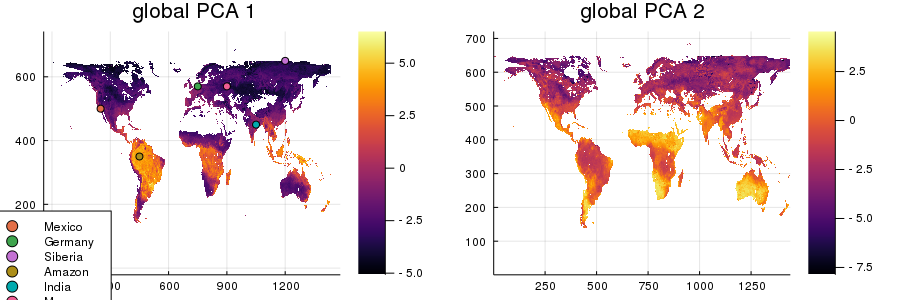

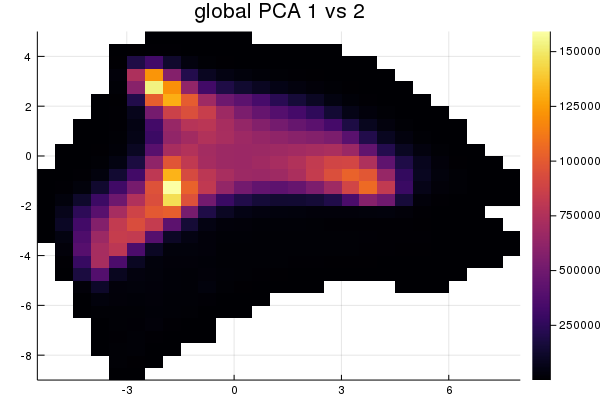

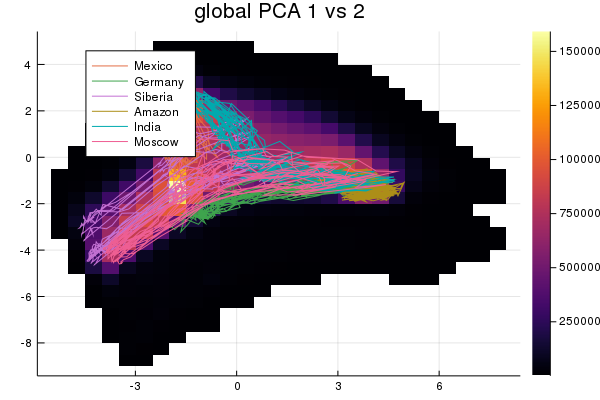

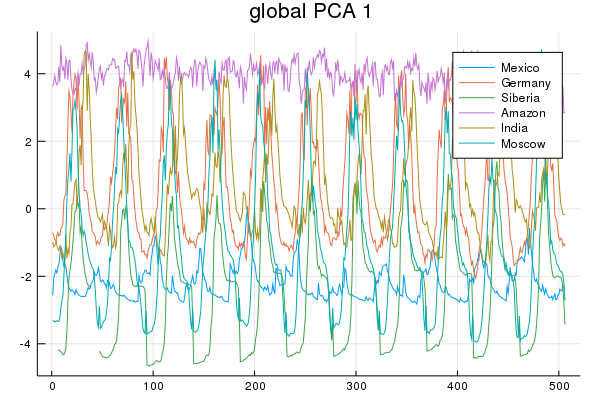

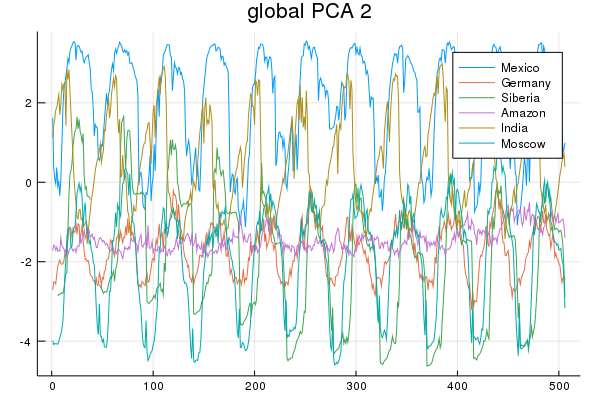

In [11]:
d1 = 1
d2 = 2
data = cube_pca_online
data_handle = ESDL.Cubes.gethandle(cube_pca_online)
valid_value_idx = cube_time_space_mask[:, :, :] .== 1

places = places
dr_method = "PCA"
scale = "global"

    p1 = plot(
        heatmap(
            data[d1, :, :, 1] |> x -> convert(Array, x) |> missing_to_nan |> rotl90,# |> rm_tails, 
            legend = (0, 0.2), title = "$scale $dr_method $d1"
        ),
        heatmap(
            data[d2, :, :, 1] |> x -> convert(Array, x) |> missing_to_nan |> rotl90,# |> rm_tails, 
            legend = (0, 0.2), title = "$scale $dr_method $d2"
        ),
        size = (900, 300),
        fmt = :png
    )   
    map((x, y, z) -> scatter!(p1, [x], [y], label = z), places...)
    p1 |> display
    

    
    p2 = histogram2d(
        keep_first_dims(data_handle, 1)[d1, vec(valid_value_idx)] |> x -> convert(Array{eltype(eltype(data_handle))}, x),
        keep_first_dims(data_handle, 1)[d2, vec(valid_value_idx)] |> x -> convert(Array{eltype(eltype(data_handle))}, x),
        title = "$scale $dr_method $d1 vs $d2",
        nbins = 40,
        legend = (0.2, 0.9),
        fmt = :png
    );
    p2 |> display
 

   
    map((x, y, z) -> plot!(p2, data[d1, x, size(data_handle, 3) - y + 1, :] |> collect |> missing_to_nan,
                               data[d2, x, size(data_handle, 3) - y + 1, :] |> collect |> missing_to_nan,
                               label = z), 
        places...)
    p2 |> display

    
    plot([ [ data[d1, places[1][i], size(data_handle, 3) - places[2][i] + 1, :] ] for i in 1:length(places[1]) ], 
         title = "$scale $dr_method $d1",
         label = places[3],
         fmt = :png) |> display
    
    plot([ [ data[d2, places[1][i], size(data_handle, 3) - places[2][i] + 1, :] ] for i in 1:length(places[1]) ],
         title = "$scale $dr_method $d2",
         label = places[3],
         fmt = :png) |> display
#end

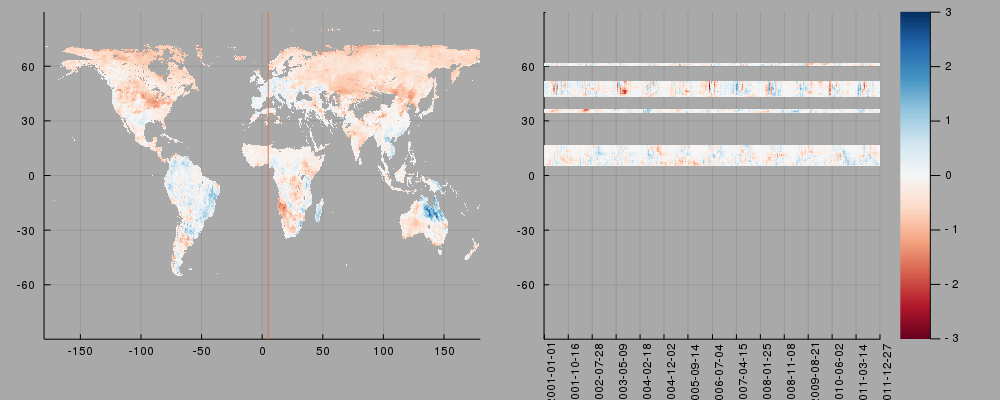

In [12]:
cutlat = 5
pc = 1

lon_ax = getAxis("Lon", pca_no_msc_cube)
lat_ax = getAxis("Lat", pca_no_msc_cube)
t_ax = getAxis("Time", pca_no_msc_cube)
#cutpoint = 900
cutpoint = axVal2Index(lon_ax, cutlat)

ex = pca_no_msc_cube[:, pc, cutpoint, :] |>
        skipmissing |>
        extrema |> 
        x -> abs.(x) |> 
        x -> max(x...) |> 
        x -> [-x, x]

p1 = heatmap(
    lon_ax.values, lat_ax.values,
    pca_no_msc_cube[1, pc, :, :] |> 
    x -> convert(Array, x) |> 
    missing_to_nan |> rotl90 |>
    x -> begin x[1:2] .= ex; x end, 
    c = :RdBu, 
    legend = false,
)
vline!(p1, [cutlat], legend = false)

s = pca_no_msc_cube[:, pc, cutpoint, :] |> 
        x -> convert(Array, x) |> 
        missing_to_nan
s[1:2, 1, 1] .= ex
p2 = heatmap(
    t_ax.values .|> string,
    lat_ax.values,
    s |> rotl90,
    c = :RdBu,
    xrotation = 90,
    #bottom_margin = 12mm
)

plot(
    p1, p2,
    size = (1000, 400), 
    bg = :darkgray,
    fmt = :png
)

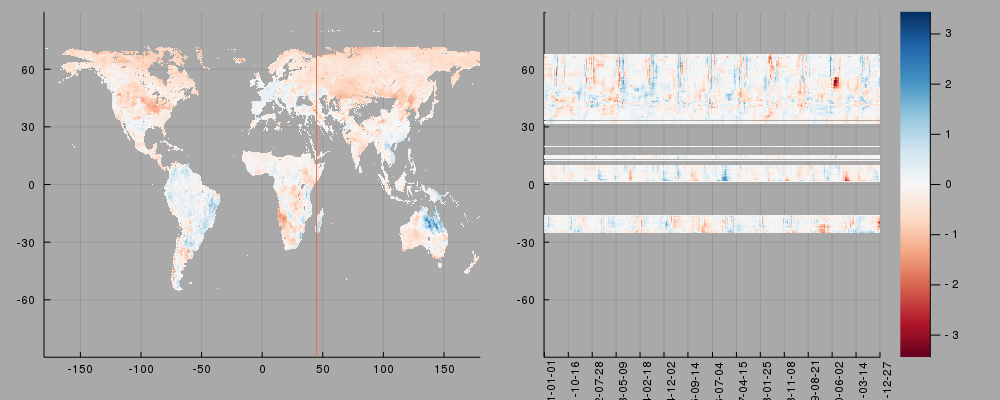

In [13]:
cutlat = 44.875
pc = 1

lon_ax = getAxis("Lon", pca_no_msc_cube)
lat_ax = getAxis("Lat", pca_no_msc_cube)
t_ax = getAxis("Time", pca_no_msc_cube)
#cutpoint = 900
cutpoint = axVal2Index(lon_ax, cutlat)

ex = pca_no_msc_cube[:, pc, cutpoint, :] |>
        skipmissing |>
        extrema |> 
        x -> abs.(x) |> 
        x -> max(x...) |> 
        x -> [-x, x]

p1 = heatmap(
    lon_ax.values, lat_ax.values,
    pca_no_msc_cube[1, pc, :, :] |> 
    x -> convert(Array, x) |> 
    missing_to_nan |> rotl90 |>
    x -> begin x[1:2] .= ex; x end, 
    c = :RdBu, 
    legend = false,
)
vline!(p1, [cutlat], legend = false)

s = pca_no_msc_cube[:, pc, cutpoint, :] |> 
        x -> convert(Array, x) |> 
        missing_to_nan
s[1:2, 1, 1] .= ex
p2 = heatmap(
    t_ax.values .|> string,
    lat_ax.values,
    s |> rotl90,
    c = :RdBu,
    xrotation = 90,
    #bottom_margin = 12mm
)

plot(
    p1, p2,
    size = (1000, 400), 
    bg = :darkgray,
    fmt = :png
)

In [22]:
rmprocs(procs())
addprocs(10)
cube_max = mapCube(
    cube_base,
    indims = InDims("Time"),
    outdims = OutDims()
) do xout, xin
   
    m = -Inf32
    for x in xin
        if x !== missing && m < x
            m = x
        end
    end
    if m > -Inf32
        xout[1] = m
    else
        xout[1] = missing
    end    
end

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Distributed/src/cluster.jl:928
Internal error: encountered unexpected error in runtime:
InterruptException()
jl_mutex_unlock at /buildworker/worker/package_linux64/build/src/locks.h:138 [inlined]
jl_typeinf_end at /buildworker/worker/package_linux64/build/src/gf.c:2610
typeinf_ext at ./compiler/typeinfer.jl:577
typeinf_ext at ./compiler/typeinfer.jl:613
jfptr_typeinf_ext_1.clone_1 at /Net/Groups/BGI/people/gkraemer/progs/julia/julia-1.1.0-bin/lib/julia/sys.so (unknown line)
jl_apply_generic at /buildworker/worker/package_linux64/build/src/gf.c:2219
jl_apply at /buildworker/worker/package_linux64/build/src/julia.h:1571 [inlined]
jl_type_infer at /buildworker/worker/package_linux64/build/src/gf.c:277
jl_compile_method_internal at /buildworker/worker/package_linux64/build/src/gf.c:1819 [inlined]
jl_fptr_trampoline at /buildworker/worker/package_linux64/build/src/

Progress: 100%|█████████████████████████████████████████| Time: 0:08:41m


Memory mapped cube with the following dimensions
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Variable            Axis with 12 elements: black_sky_albedo evaporation .. terrestrial_ecosystem_respiration white_sky_albedo 
Total size: 59.33 MB


ErrorException: Could not find scope scope-fb5521fa-ed4f-4700-8331-3047977b9a06

ErrorException: Could not find scope scope-c8ea3f3d-7815-4544-91d3-86a6e6890f4d

ErrorException: Could not find scope scope-d888ced2-fd61-411f-868f-f3213436368c

ErrorException: Could not find scope knockout-component-2105f9ea-6e2c-404b-a4a2-ef5bee4a042e

ErrorException: Could not find scope knockout-component-2aeecb23-6e7e-44ab-88fa-dcb8eeffb05c

ErrorException: Could not find scope knockout-component-06a0c533-7d11-4ad7-9d33-5d3bc9cb6147

ErrorException: Could not find scope scope-8719bbd9-28aa-427d-9fb3-d758bc88c614

ErrorException: Could not find scope knockout-component-8d9acab8-71b9-42e1-8f45-7788b6b97c82